<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395 Redes Neuronales Artificiales 2019-1</h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<hr style="height:2px;border:none"/>

## Integrantes

* _**Francisco Olivares - 201473575-8 - francisco.olivars.14@sansano.usm.cl**_
* _**Gabriel Valenzuela - 201473505-7 - gabriel.valenzuel.14@sansano.usm.cl**_
* _**Felipe Vega - 201473511-1 - felipe.vega.14@sansano.usm.cl**_



<hr style="height:2px;border:none"/>

In [1]:
#Bloque de los imports
#Soy tu bloque pa' los imports papi
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact 


#Sklearn stuff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Keras stuff
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

#Que se vea ancho el jupyter
from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; } .text_cell_render p {font-size: 20}</style>"))


#Cantidad de columnas a mostrar con pandas
pd.set_option('display.max_columns',100)

Using TensorFlow backend.


Se procede a cargar el dataset

In [2]:
df_sets = pd.read_csv("data/koi_sets_unb.csv")

mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values

df_labels = pd.read_csv("data/koi_labels.csv")
df_X = pd.read_csv("data/koi_light_curves_X.csv")
df_labels_train = df_labels[mask_train]
df_labels_test = df_labels[mask_test]
df_X_train = df_X[mask_train]
df_X_test = df_X[mask_test]

In [3]:
y_train = ((df_labels_train["NExScI Disposition"]=="CONFIRMED")*1).values
y_test = ((df_labels_test["NExScI Disposition"]=="CONFIRMED")*1).values
df_X_train = df_X_train.reset_index(drop=True)
df_X_test = df_X_test.reset_index(drop=True)
df_X_train.fillna(df_X_train.median(), inplace=True)
df_X_test.fillna(df_X_test.median(), inplace=True)
X_train = df_X_train.values[:,1:]
X_test = df_X_test.values[:,1:]

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,stratify=y_train,random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled =  scaler.transform(X_test)

/home/francisco/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/francisco/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/francisco/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/francisco/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## a)
En esta primera instancia se trabajará con una red *shallow* (poco profunda) con una gran cantidad de neuronas situadas en una capa, inicializada con pesos uniforme. Visualice el gradiente de la función de pérdida (*loss*) para el conjunto de entrenamiento (promedio del gradiente de cada dato) respecto a los pesos en las distintas capas, para esto se le pedirá el cálculo del gradiente para una capa mediante la función de *gradients* (__[link](https://www.tensorflow.org/api_docs/python/tf/keras/backend/gradients)__) en el *backend* de Keras, otra opción es a través de un __[monitor](https://keras.io/callbacks/#tensorboard)__. Deberá generar un **histograma** para todos los pesos de cada capa antes y despues del entrenamiento con 50 *epochs*. Comente.

In [5]:
# Calculo de gradientes
from keras import backend as K
import keras
import tensorflow as tf

model = Sequential()
model.add(Dense(1280, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='sigmoid'))

# model.compile(optimizer=SGD(lr=0.01), loss='mean_squared_error', metrics=['acc'])
model.compile(optimizer=SGD(lr=0.01), loss='binary_crossentropy', metrics=['acc'])

# Se saca la función de perdida a ocupar
# loss = keras.losses.mean_squared_error(model.output,y_train)
loss = keras.losses.binary_crossentropy(model.output,K.variable(np.reshape(y_train, (-1, 1))))

# Los pesos entrenables de la red
listOfVariableTensors = model.trainable_weights 

# Se manda a crear la función que calculara los gradientes
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()

# Se hecha a correr
evaluated_gradients_A = sess.run(gradients,feed_dict={model.input:X_train_scaled})

# Como son varios ejemplos, estos terminan sumados por lo que se tiene que dividir
# por el número de ejemplos para sacar el promedio del valor de los gradientes
evaluated_gradients_A = [gradient/len(y_train) for gradient in evaluated_gradients_A]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [6]:
# Se entrena el modelo con 50 epochs y se hace lo mismo que arriba
history_A = model.fit(X_train_scaled, y_train, epochs=50, verbose=0, validation_data=(X_val_scaled, y_val))
evaluated_gradients_50_A = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_50_A = [gradient/len(y_train) for gradient in evaluated_gradients_50_A]

Gradientes pre-entrenamiento


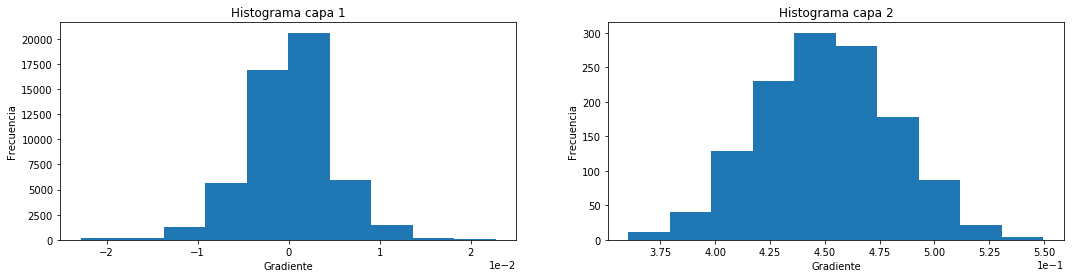

Gradientes post-entrenamiento


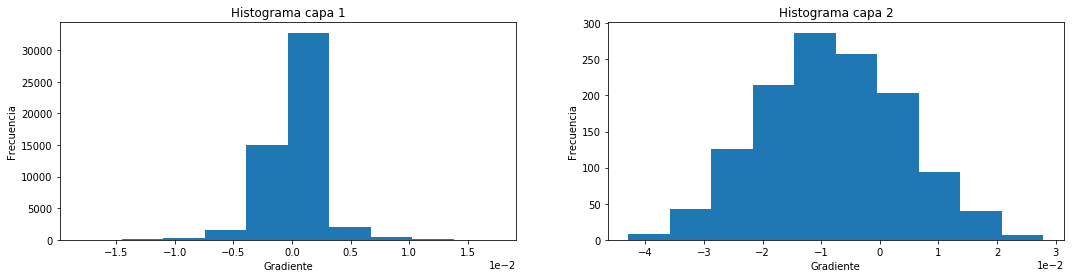

In [7]:
def show_hist_1(gradients):
    points_1 = list()
    for arr in gradients[0]:
        for i in arr:
            points_1.append(i)

    points_2 = list()
    for arr in gradients[2]:
        for i in arr:
            points_2.append(i)


    plt.figure(figsize=(18,4))

    plt.subplot(1, 2, 1)
    plt.hist(points_1)
    plt.title('Histograma capa 1')
    plt.xlabel('Gradiente')
    plt.ylabel('Frecuencia')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    plt.subplot(1, 2, 2)
    plt.hist(points_2)
    plt.title('Histograma capa 2')
    plt.xlabel('Gradiente')
    plt.ylabel('Frecuencia')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    plt.show()
    #axes = plt.gca()
    # axes.set_xlim([xmin,xmax])
    # axes.set_ylim([0,30000])
    
    #plt.show()
    
print("Gradientes pre-entrenamiento")
show_hist_1(evaluated_gradients_A)
print("Gradientes post-entrenamiento")
show_hist_1(evaluated_gradients_50_A)

Al vel el histograma de los gradientes se aprecia que previo al entrenamiento la gran mayoria de los gradientes de la primera capa están en torno al 0. Esto era de esperarse ya que la magnitud de los gradientes de una capa superior a otra inferior debiese decrecer abruptamente.

En el caso después del entrenamiento (post 50 epochs) se aprecia que la magnitud de los gradientes de la capa de salida ha disminuido un orden de magnitud. Esto se debe a que después de haber hecho 50 epochs por el método de optimización del SGD se espera que el punto actual en el que se está parado (pesos de la red) estén más cerca de un candidato a óptimo. Respecto a la primera capa se aprecia que se mantienen los ordenes de magnitud de los gradientes, pero aumentaron considerablemente la cantidad de gradientes con valores en torno al 0. 

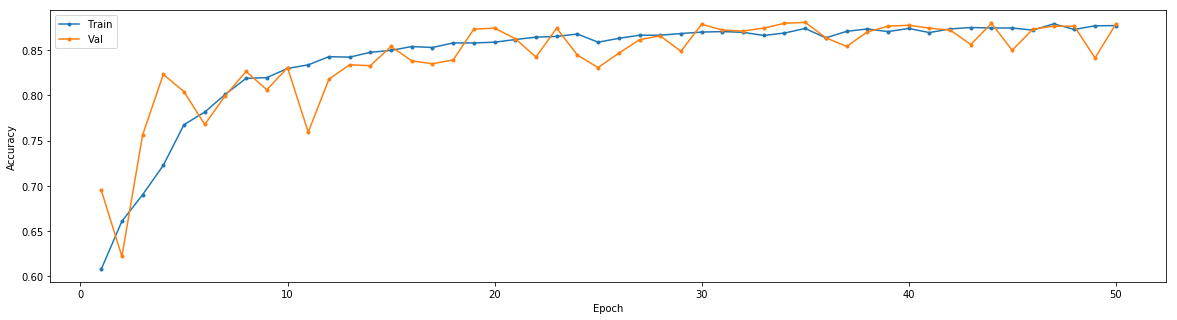

In [8]:
def chart_acc(history, epoch_number):
    epoch_arr = [i+1 for i in range(epoch_number)]
    plt.figure(figsize = (20,5))
    plt.plot(epoch_arr, history.history['acc'], '.-')
    plt.plot(epoch_arr, history.history['val_acc'], '.-')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend( ('Train', 'Val') )

    plt.show()

chart_acc(history_A, 50)

Al ver el gráfico del accuracy en función de los epochs se aprecia que efectivamente la red neuronal aprende a clasificar si es exoplaneta o no. También se corrobora lo que se había dicho anteriormente de que la red se va acercando a un óptimo (por el SGD) haciendo que tenga sentido que la magnitud de los gradientes decremente.

## b)

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='sigmoid'))

# model.compile(optimizer=SGD(lr=0.01), loss='mean_squared_error')
model.compile(optimizer=SGD(lr=0.01), loss='binary_crossentropy', metrics=['acc'])

# loss = keras.losses.mean_squared_error(model.output,y_train)
loss = keras.losses.binary_crossentropy(model.output,K.variable(np.reshape(y_train, (-1, 1))))

listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()

evaluated_gradients_B = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_B = [gradient/len(y_train) for gradient in evaluated_gradients_B]

history = model.fit(X_train_scaled, y_train, epochs=50, verbose=0, validation_data=(X_val_scaled, y_val))

evaluated_gradients_50_B = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_50_B = [gradient/len(y_train) for gradient in evaluated_gradients_50_B]

In [ ]:
def show_hist_2(gradients):
    points_1 = list()
    for arr in gradients[0]:
        for i in arr:
            points_1.append(i)

    points_2 = list()
    for arr in gradients[2]:
        for i in arr:
            points_2.append(i)
            
    points_3 = list()
    for arr in gradients[4]:
        for i in arr:
            points_3.append(i)

    plt.figure(figsize=(18,4))

    plt.subplot(1, 3, 1)
    plt.hist(points_1)
    plt.title('Histograma capa 1')
    plt.xlabel('Gradiente')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=50)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    plt.subplot(1, 3, 2)
    plt.hist(points_2)
    plt.title('Histograma capa 2')
    plt.xlabel('Gradiente')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=50)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
    plt.subplot(1, 3, 3)
    plt.hist(points_3)
    plt.title('Histograma capa 3')
    plt.xlabel('Gradiente')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=50)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    plt.show()
    
print("Gradientes pre-entrenamiento")
show_hist_2(evaluated_gradients_B)
print("Gradientes post-entrenamiento")
show_hist_2(evaluated_gradients_50_B)

## c)


In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='sigmoid'))

# model.compile(optimizer=SGD(lr=0.01), loss='mean_squared_error')
model.compile(optimizer=SGD(lr=0.01), loss='binary_crossentropy', metrics=['acc'])

# loss = keras.losses.mean_squared_error(model.output,y_train)
loss = keras.losses.binary_crossentropy(model.output,K.variable(np.reshape(y_train, (-1, 1))))

listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients_C = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_C = [gradient/len(y_train) for gradient in evaluated_gradients_C]
model.fit(X_train_scaled, y_train, epochs=50, verbose=0, validation_data=(X_val_scaled, y_val))
evaluated_gradients_50_C = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_50_C = [gradient/len(y_train) for gradient in evaluated_gradients_50_C]

print("Gradientes pre-entrenamiento")
show_hist_2(evaluated_gradients_C)
print("Gradientes post-entrenamiento")
show_hist_2(evaluated_gradients_50_C)

## d)

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='relu'))
model.add(Dense(256, kernel_initializer='uniform',activation='relu'))
model.add(Dense(256, kernel_initializer='uniform',activation='relu'))
model.add(Dense(256, kernel_initializer='uniform',activation='relu'))
model.add(Dense(256, kernel_initializer='uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='uniform',activation='relu'))

# model.compile(optimizer=SGD(lr=0.01), loss='mean_squared_error')
model.compile(optimizer=SGD(lr=0.01), loss='binary_crossentropy', metrics=['acc'])

# loss = keras.losses.mean_squared_error(model.output,y_train)
loss = keras.losses.binary_crossentropy(model.output,K.variable(np.reshape(y_train, (-1, 1))))

listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients_D_1 = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_D_1 = [gradient/len(y_train) for gradient in evaluated_gradients_D_1]
model.fit(X_train_scaled, y_train, epochs=50, verbose=0, validation_data=(X_val_scaled, y_val))
evaluated_gradients_50_D_1 = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_50_D_1 = [gradient/len(y_train) for gradient in evaluated_gradients_50_D_1]

print("Gradientes pre-entrenamiento")
show_hist_2(evaluated_gradients_D_1)
print("Gradientes post-entrenamiento")
show_hist_2(evaluated_gradients_50_D_1)

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='he_uniform',activation='relu'))

# model.compile(optimizer=SGD(lr=0.01), loss='mean_squared_error')
model.compile(optimizer=SGD(lr=0.01), loss='binary_crossentropy', metrics=['acc'])

# loss = keras.losses.mean_squared_error(model.output,y_train)
loss = keras.losses.binary_crossentropy(model.output,K.variable(np.reshape(y_train, (-1, 1))))

listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients_D_2 = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_D_2 = [gradient/len(y_train) for gradient in evaluated_gradients_D_2]
model.fit(X_train_scaled, y_train, epochs=50, verbose=0, validation_data=(X_val_scaled, y_val))
evaluated_gradients_50_D_2 = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_50_D_2 = [gradient/len(y_train) for gradient in evaluated_gradients_50_D_2]

print("Gradientes pre-entrenamiento")
show_hist_2(evaluated_gradients_D_2)
print("Gradientes post-entrenamiento")
show_hist_2(evaluated_gradients_50_D_2)

## e)

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='he_uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='he_uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='he_uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='he_uniform',activation='softplus'))
model.add(Dense(1, kernel_initializer='he_uniform',activation='sigmoid'))

# model.compile(optimizer=SGD(lr=0.01), loss='mean_squared_error')
model.compile(optimizer=SGD(lr=0.01), loss='binary_crossentropy', metrics=['acc'])

# loss = keras.losses.mean_squared_error(model.output,y_train)
loss = keras.losses.binary_crossentropy(model.output,K.variable(np.reshape(y_train, (-1, 1))))

error_1 = model.evaluate(X_val_scaled, y_val)

listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients_E = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_E = [gradient/len(y_train) for gradient in evaluated_gradients_E]
history=model.fit(X_train_scaled, y_train, epochs=50, verbose=0, validation_data=(X_val_scaled, y_val))

error_2 = model.evaluate(X_val_scaled, y_val)

evaluated_gradients_50_E = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_50_E = [gradient/len(y_train) for gradient in evaluated_gradients_50_E]

print("Gradientes pre-entrenamiento")
show_hist_2(evaluated_gradients_E)
print("Gradientes post-entrenamiento")
show_hist_2(evaluated_gradients_50_E)

In [ ]:
print(error_1)
print(error_2)

history.history